In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
relay = pd.read_csv(r'c:\Users\thoma\PycharmProjects\UKCompData\WCA_Relay.csv')
relay = relay.drop(['rank'], axis=1)
relay.head()

,wcaId,name,single,average,single_score,average_score
0,2012PARK03,Max Park,231.02,253.13,97.24,97.09
1,2009ZEMD01,Feliks Zemdegs,253.09,274.49,96.09,96.04
2,2009HAYS01,Kevin Hays,262.03,296.07,95.54,94.74
3,2012BEAH01,Ciarán Beahan,262.14,284.12,95.54,95.49
4,2013NAHM01,Seung Hyuk,274.97,288.68,94.66,95.22


In [3]:
persons = pd.read_csv(r'c:\Users\thoma\PycharmProjects\UKCompData\WCA Database\WCA_export_Persons.tsv', delimiter='\t')
countries = pd.read_csv(r'c:\Users\thoma\PycharmProjects\UKCompData\WCA Database\WCA_export_Countries.tsv', delimiter='\t')

In [4]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148870 entries, 0 to 148869
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         148870 non-null  object
 1   subid      148870 non-null  int64 
 2   name       148870 non-null  object
 3   countryId  148870 non-null  object
 4   gender     148487 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [5]:
persons = persons.drop(['subid', 'gender'], axis=1)

In [6]:
persons.head()

,id,name,countryId
0,1982BORS01,Jozsef Borsos,Serbia
1,1982BRIN01,Roland Brinkmann,Germany
2,1982CHIL01,Julian Chilvers,United Kingdom
3,1982FRID01,Jessica Fridrich,USA
4,1982FRID01,Jessica Fridrich,Czech Republic


In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           207 non-null    object
 1   name         207 non-null    object
 2   continentId  207 non-null    object
 3   iso2         206 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [8]:
countries = countries.drop(['iso2'], axis=1)

In [9]:
def continent(cont):
    cntnnt = []
    for i in range(len(countries.id)):
        if countries.continentId[i] == cont:
            cntnnt.append(countries.id[i])
    return cntnnt

In [10]:
europe = continent('_Europe')

In [11]:
europe[-5:]

['Turkey', 'Ukraine', 'United Kingdom', 'Vatican City', 'XE']

In [12]:
def country(nation):
    wcaid = []
    name = []
    for i in range(len(persons.id)):
        if persons.countryId[i] == nation:
            wcaid.append(persons.id[i])
            name.append(persons.name[i])
    return wcaid, name

In [13]:
UK_WCAID, UK_Name = country('United Kingdom')

In [14]:
def score(column):
    norm_col = np.log1p(column)
    mean = np.mean(norm_col)
    std = np.std(norm_col)
    z_col = [(x-mean)/std for x in norm_col]
    points = [round(100/(1+np.exp(z)), 2) for z in z_col]
    return points

In [15]:
def country_relay(state, s=False, a=False):
    if state[0] == '_':
        wcaid = []
        n = []
        for nation in continent(state):
            w, m = country(nation)
            wcaid += w
            n += m
    else:
        wcaid, n = country(state)
        
    Id = []
    name = []
    single = []
    average = []
    for i in range(len(relay.wcaId)):
        if relay.wcaId[i] in wcaid:
            Id.append(relay.wcaId[i])
            name.append(relay.name[i])
            single.append(relay.single[i])
            average.append(relay.average[i])
    single_score = score(single)
    average_score = score(average)
    df = pd.DataFrame({'rank_single':np.arange(1, len(Id)+1, 1) ,'wcaId':Id, 'name':name,
                      'single':single, 'average':average, 'single_score':single_score,
                      'average_score':average_score})
    df = df.sort_values('average')
    df['rank_average'] = np.arange(1, len(Id)+1, 1)
    if s:
        df = df[['rank_single', 'wcaId', 'name', 'single', 'single_score']].reset_index(drop='index')
    if a:
        df = df[['rank_average', 'wcaId', 'name', 'average', 'average_score']].reset_index(drop='index')
    if not s and not a:
        df = df[['rank_single', 'rank_average', 'wcaId', 'name', 'single', 
                 'average', 'single_score', 'average_score']].reset_index(drop='index')
    return df

In [16]:
UK_Relay = country_relay('United Kingdom')
UK_Relay.head(10)

,rank_single,rank_average,wcaId,name,single,average,single_score,average_score
0,1,1,2014JAYE01,Eli Jay,313.85,347.86,91.98,91.40
1,2,2,2009YAUR01,Robert Yau,338.84,368.89,89.16,89.17
2,4,3,2007VALL01,Breandan Vallance,360.83,394.41,86.22,86.03
3,5,4,2015JACK04,Sam Jacklin,363.32,400.83,85.87,85.16
4,3,5,2013MAHM02,Sameer Mahmood,359.80,401.18,86.37,85.11
5,7,6,2016EVAN06,Daniel Evans,378.73,407.23,83.53,84.27
6,6,7,2014SCHW02,Fabio Schwandt,375.77,409.36,84.00,83.96
7,10,8,2009SHEP01,Daniel Sheppard,386.86,415.28,82.23,83.10
8,12,9,2013SAVA01,Harry Savage,397.56,421.72,80.43,82.14
9,9,10,2015EWBA01,Joe Ewbank,386.46,422.95,82.29,81.95


In [17]:
UK_Relay = country_relay('United Kingdom', s=True)
UK_Relay.head(10)

,rank_single,wcaId,name,single,single_score
0,1,2014JAYE01,Eli Jay,313.85,91.98
1,2,2009YAUR01,Robert Yau,338.84,89.16
2,4,2007VALL01,Breandan Vallance,360.83,86.22
3,5,2015JACK04,Sam Jacklin,363.32,85.87
4,3,2013MAHM02,Sameer Mahmood,359.80,86.37
5,7,2016EVAN06,Daniel Evans,378.73,83.53
6,6,2014SCHW02,Fabio Schwandt,375.77,84.00
7,10,2009SHEP01,Daniel Sheppard,386.86,82.23
8,12,2013SAVA01,Harry Savage,397.56,80.43
9,9,2015EWBA01,Joe Ewbank,386.46,82.29


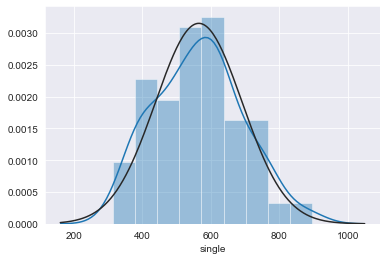

In [18]:
from scipy.stats import norm
sns.set_style('darkgrid')
sns.distplot(UK_Relay.single, fit=norm)
plt.show()

In [19]:
UK_Relay = country_relay('United Kingdom', a=True)
UK_Relay.head(10)

,rank_average,wcaId,name,average,average_score
0,1,2014JAYE01,Eli Jay,347.86,91.40
1,2,2009YAUR01,Robert Yau,368.89,89.17
2,3,2007VALL01,Breandan Vallance,394.41,86.03
3,4,2015JACK04,Sam Jacklin,400.83,85.16
4,5,2013MAHM02,Sameer Mahmood,401.18,85.11
5,6,2016EVAN06,Daniel Evans,407.23,84.27
6,7,2014SCHW02,Fabio Schwandt,409.36,83.96
7,8,2009SHEP01,Daniel Sheppard,415.28,83.10
8,9,2013SAVA01,Harry Savage,421.72,82.14
9,10,2015EWBA01,Joe Ewbank,422.95,81.95


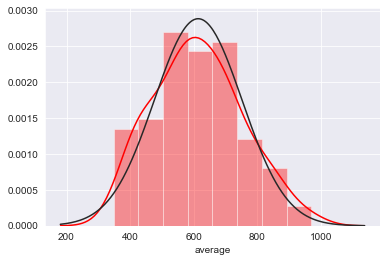

In [20]:
from scipy.stats import norm
sns.set_style('darkgrid')
sns.distplot(UK_Relay.average, fit=norm, color='red')
plt.show()

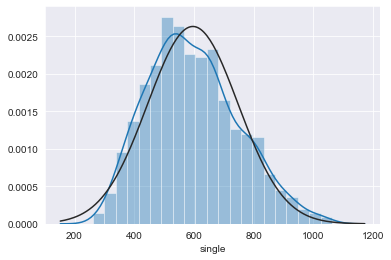

In [21]:
from scipy.stats import norm
sns.set_style('darkgrid')
EU_Relay = country_relay('_Europe')
sns.distplot(EU_Relay.single, fit=norm)
plt.show()

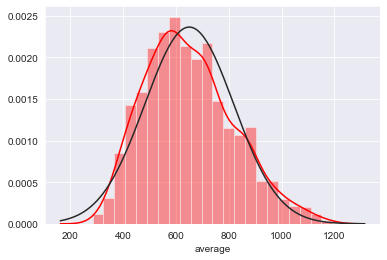

In [22]:
from scipy.stats import norm
sns.set_style('darkgrid')
sns.distplot(EU_Relay.average, fit=norm, color='red')
plt.show()